# Práctica Clustering

* **Alumno 1**: Javier Barragán Haro
* **Alumno 2**: Victor Nieves Sanchez

## 1. Introducción
En esta practica se pretende enseñar lo aprendido en las primeras semanas de la segunda parte de la asignatura. La idea era poder mostrar lo siguiente:
- Algoritmo k-means
- Algoritmo secuencial
- Algoritmo mainshift _(no implementado)_

## 2. Implementación propia del k-means
Primero, hemos intentado implementar el clasificador k-means. K-means es un algoritmo de clasificación **no supervisada (clusterización)** que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:
1. **Inicialización**: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
2. **Asignación objetos a los centroides**: cada objeto de los datos es asignado a su centroide más cercano.
3. **Actualización centroides**: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.

El algoritmo k-means resuelve un **problema de optimización**, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

In [37]:
import copy as cp

def init(k,data,category):

    # Number of features in the data
    c = data.shape[1]

    # Generacion aletaria de nuevos centros
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    # Plot the data and the centers generated as random
    colors=['orange', 'blue', 'green']
    # Tamaño del dataset
    number = data.shape[0]
    for i in range(number):
        plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
    
def new_centers(data,number,k):
    centers_old = np.zeros(centers.shape) # Centros antiguos
    centers_new = cp.deepcopy(centers) # Nuevos centros
    data.shape
    clusters = np.zeros(number)
    distancias = np.zeros((number,k))
    error = np.linalg.norm(centers_new - centers_old)
    print(centers)
    # Si despues de una iteraccion el centro es el mismo se sale del bucle
    while error != 0:

        for i in range(k):
            distancias[:,i] = np.linalg.norm(data - centers[i], axis=1)
            
        clusters = np.argmin(distances, axis = 1)
        centers_old = cp.deepcopy(centers_new)
        # Se calcula la media en cada uno de lso datos para recalcular el nuevo centro
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    centers_new       

# Plot the data and the centers generated as random
def plot():
    colors=['orange', 'blue', 'green']
    for i in range(n):
        plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
    plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

Ahora intentaremos ejecutar nuestro clasificador con la dataset **IRIS**.

(150, 4)


NameError: name 'centers' is not defined

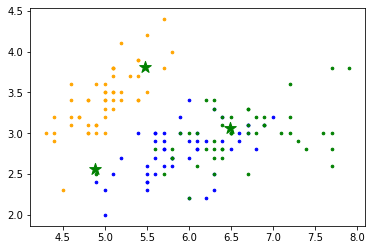

In [38]:
# IRIS test
from sklearn.datasets import load_iris
dataset = load_iris()
data = dataset.data
labels = dataset.target
init(3,data,labels)
print(data.shape)
new_centers(data,data.shape[0],5)
plot()

Ya que nos estaban dando muchos errores y no nos estaba dando una solución que considerasemos aceptable, decidimos utiliazr algunas de las librerías que ya existen

## 3. K-means Clustering
En este apartado se mostrará las soluciones que devuelve el algoritmo utilizado en las distintas dataset que se han utilizado en la asignatura.

Primero, crearemos una **función auxiliar** para comprobar el **numero de aciertos** de nuestro clasificador, comparando los obtenidos tras la realización del algoritmo, y los reales.


In [59]:
def num_aciertos(x, y):
        """Cuenta el numero de aciertos del clasificador para un conjunto de datos X.
        X: matriz de datos a clasificar
        y: vector de etiquetas correctas"""
        same_values = []
        [same_values.append(x[i] == y[i]) for i in range(0, len(y))]
        number = same_values.count(True)
        return number, (number / len(x)) * 100

### 3.1 IRIS dataset

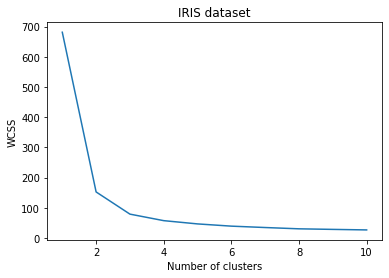

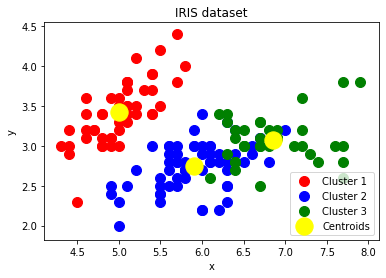

IRIS Database
Correct answers: 134 / 150
Success rate: 89.33333333333333


In [60]:
# K-Means Clustering for IRIS

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
dataset = load_iris()
data = dataset.data
labels = dataset.target

# Importing the dataset
dataset = dataset
X = dataset.data 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('IRIS dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#print (y_kmeans,"\n-----------------")

for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 1:
        y_kmeans[i] = y_kmeans[i]-1
    elif y_kmeans[i] == 0:
        y_kmeans[i] = y_kmeans[i]+1
    
#print (y_kmeans)
#print(labels)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('IRIS dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_kmeans, labels)
print("IRIS Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 3.2 WINE dataset

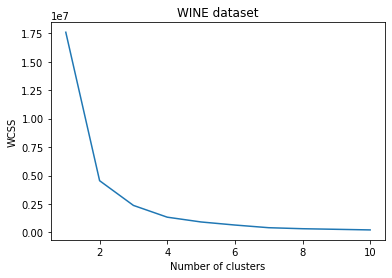

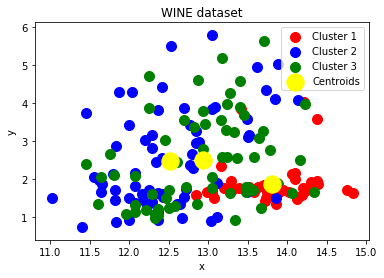

WINE Database
Correct answers: 125 / 178
Success rate: 70.2247191011236


In [61]:
# K-Means Clustering for WINE

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_wine
# --------- Wine database ---------
dataset = load_wine()
data = dataset.data
labels = dataset.target

# Importing the dataset
dataset = dataset
X = dataset.data 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('WINE dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#print (y_kmeans,"\n-----------------")

for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 1:
        y_kmeans[i] = y_kmeans[i]-1
    elif y_kmeans[i] == 0:
        y_kmeans[i] = y_kmeans[i]+1
    
#print (y_kmeans)
#print(labels)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('WINE dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_kmeans, labels)
print("WINE Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 3.3 Cancer dataset

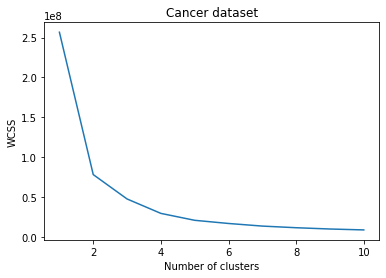

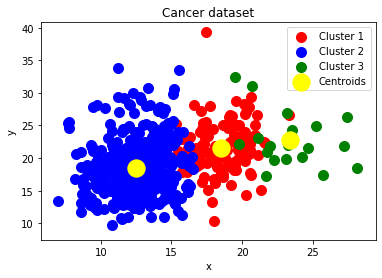

Cancer Database
Correct answers: 474 / 569
Success rate: 83.30404217926186


In [62]:
# K-Means Clustering for Cancer
from sklearn.datasets import load_breast_cancer

# --------- Cancer database ---------
dataset = load_breast_cancer()
data = dataset.data
labels = dataset.target

# Importing the dataset
dataset = dataset
X = dataset.data 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Cancer dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#print (y_kmeans,"\n-----------------")

for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 1:
        y_kmeans[i] = y_kmeans[i]-1
    elif y_kmeans[i] == 0:
        y_kmeans[i] = y_kmeans[i]+1
    
#print (y_kmeans)
#print(labels)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cancer dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_kmeans, labels)
print("Cancer Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 3.4 ISOLET dataset

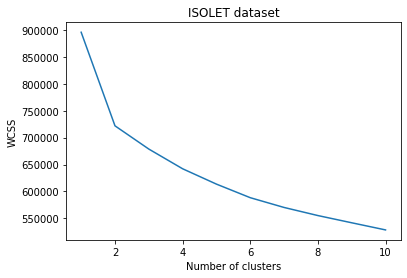

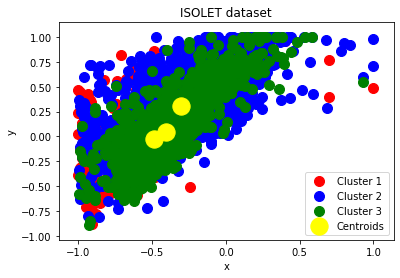

ISOLET Database
Correct answers: 520 / 7797
Success rate: 6.669231755803515


In [103]:
# K-Means Clustering for ISOLET
from sklearn.datasets import fetch_openml
import pandas as pd

data, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
labels = pd.factorize(y)[0]

# Importing the dataset
#dataset = dataset
X = data 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('ISOLET dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 1:
        y_kmeans[i] = y_kmeans[i]-1
    elif y_kmeans[i] == 0:
        y_kmeans[i] = y_kmeans[i]+1

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('ISOLET dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_kmeans, labels)
print("ISOLET Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 3.5 MNIST dataset

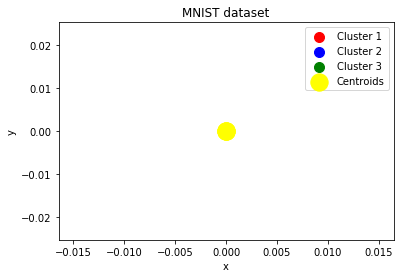

MNIST Database
Correct answers: 7831 / 60000
Success rate: 13.051666666666668


In [69]:
# K-Means Clustering for MNIST
# ------ MNIST Database ------
# 1. Cargamos MNIST desde internet ( https://www.openml.org/d/554 )
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000]
labels = pd.factorize(y)[0]

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
"""
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('MNIST dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
"""
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#print (y_kmeans,"\n-----------------")

for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 1:
        y_kmeans[i] = y_kmeans[i]-1
    elif y_kmeans[i] == 0:
        y_kmeans[i] = y_kmeans[i]+1
    

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('MNIST dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_kmeans, labels)
print("MNIST Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 3.6 Conclusión
Como hemos visto, para algunas de las datasets como IRIS, WINE y Cancer, el clasificador tiene un buen rendimiento (aunque algo más bajo en WINE). Mientras que en las ultimas dos dataset (ISOLET y MNIST) falla más ya que los datos están más agrupados.

También hemos realizado varias pruebas cambiando el número de clusters (k), y al final, el que mejor resultados ha dado en las distintas muestras ha sido $k=3$

Respecto a la grafica de MNIST, no se muestra correctamente, ya que los ejes no están bien formados. La escala debería ser mucho mayor. Además, no se ha podido mostrar la tabla de clustering, ya que tardama demasiado la ejecución y acababa debolviendo un error

## 4 Algoritmo secuencial
Los llamados métodos jerárquicos tienen por objetivo agrupar clusters para formar uno nuevo o bien
separar alguno ya existente para dar origen a otros dos, de tal forma que, si sucesivamente se va efectuando
este proceso de aglomeraci´on o división, se minimice alguna distancia o bien se maximice alguna medida de
similitud.

Los métodos jerárquicos se subdividen en aglomerativos y disociativos. Cada una de estas categorías
presenta una gran diversidad de variantes.
1. Los métodos **aglomerativos**, también conocidos como ascendentes, comienzan el análisis con tantos
grupos como individuos haya. A partir de estas unidades iniciales se van formando grupos, de forma
ascendente, hasta que al final del proceso todos los casos tratados est´an englobados en un mismo
conglomerado.
2. Los métodos **disociativos**, también llamados descendentes, constituyen el proceso inverso al anterior.
Comienzan con un conglomerado que engloba a todos los casos tratados y, a partir de este grupo inicial,
a través de sucesivas divisiones, se van formando grupos cada vez más peque˜nos. Al final del proceso
se tienen tantas agrupaciones como casos han sido tratados.

### 4.1 IRIS dataset

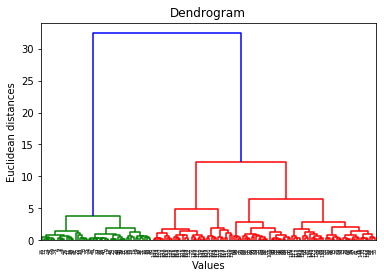

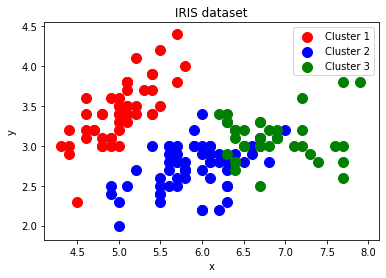

IRIS Database
Correct answers: 134 / 150
Success rate: 89.33333333333333


In [102]:
# Hierarchical Clustering IRIS

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = load_iris()
X = dataset.data
labels = dataset.target

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Values')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

for i in range(0, len(y_hc)):
    if y_hc[i] == 1:
        y_hc[i] = y_hc[i]-1
    elif y_hc[i] == 0:
        y_hc[i] = y_hc[i]+1
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('IRIS dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_hc, labels)
print("IRIS Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 4.2 WINE dataset

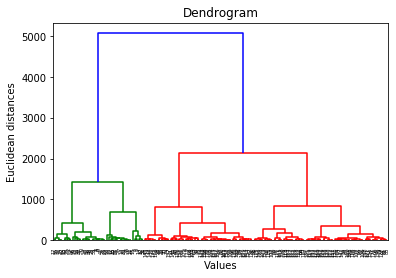

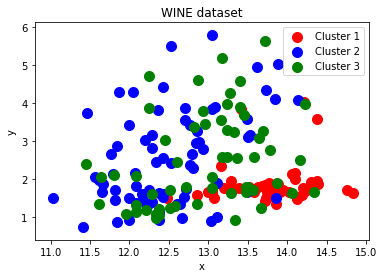

WINE Database
Correct answers: 124 / 178
Success rate: 69.66292134831461


In [101]:
# Hierarchical Clustering WINE

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = load_wine()
X = dataset.data
labels = dataset.target

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Values')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

"""
for i in range(0, len(y_hc)):
    if y_hc[i] == 1:
        y_hc[i] = y_hc[i]-1
    elif y_hc[i] == 0:
        y_hc[i] = y_hc[i]+1
"""

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('WINE dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_hc, labels)
print("WINE Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 4.3 Cancer dataset

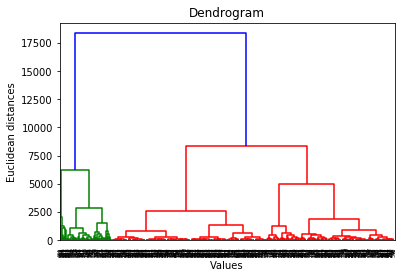

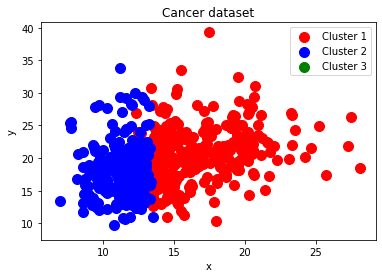

Cancer Database
Correct answers: 466 / 569
Success rate: 81.89806678383128


In [100]:
# Hierarchical Clustering Cancer

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = load_breast_cancer()
X = dataset.data
labels = dataset.target

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Values')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

for i in range(0, len(y_hc)):
    if y_hc[i] == 1:
        y_hc[i] = y_hc[i]-1
    elif y_hc[i] == 2:
        y_hc[i] = y_hc[i]-1

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Cancer dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_hc, labels)
print("Cancer Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 4.4 ISOLET dataset

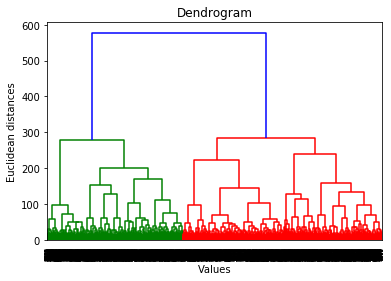

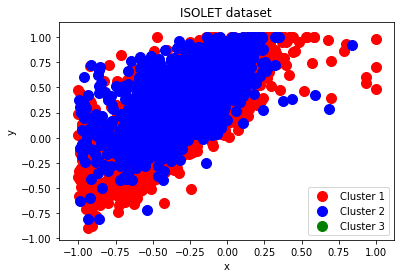

ISOLET Database
Correct answers: 265 / 569
Success rate: 3.3987431063229447


In [98]:
# Hierarchical Clustering ISOLET

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data, y = fetch_openml('isolet', version=1, return_X_y=True, cache=True)
labels = pd.factorize(y)[0]

# Importing the dataset
#dataset = dataset
X = data 
labels = dataset.target

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Values')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
for i in range(0, len(y_hc)):
    if y_hc[i] == 1:
        y_hc[i] = y_hc[i]-1
    elif y_hc[i] == 2:
        y_hc[i] = y_hc[i]-1

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('ISOLET dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_hc, labels)
print("ISOLET Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 4.5 MNIST dataset

In [ ]:
# Hierarchical Clustering ISOLET

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 1. Cargamos MNIST desde internet ( https://www.openml.org/d/554 )
all_X, all_y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)
X = all_X[:60000]
y = all_y[:60000]
labels = pd.factorize(y)[0]

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Values')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
for i in range(0, len(y_hc)):
    if y_hc[i] == 1:
        y_hc[i] = y_hc[i]-1
    elif y_hc[i] == 2:
        y_hc[i] = y_hc[i]-1

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('MNIST dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

correct = num_aciertos(y_hc, labels)
print("MNIST Database")
print("Correct answers:", correct[0], "/", len(labels))
print("Success rate:", correct[1])

### 4.6 Conclusiones
De manera parecida al algoritmo K-means, este algoritmo ha funcionado correctamente para las primeras 3 dataset. Las últimas dos, al ser de tamaño mayor, no ha funcionado bien el algoritmo.

Además, hay que destacar que el tiempo de ejecución de las dos últimas dataset es increiblemente alto. **Más de 5 minutos** para ambas ejecuciones. Y en la dataset de MNIST, no se ha podido ejecutar, ya que tardaba mucho y además daba errores de ejecución.

## 5. Conclusion final
- **Algoritmo K-means**
  - Pros: Adaptable, trabaja bien en pequeñas y grandes datasets, rápido y eficiente
  - Contras: Necesitas elegir el número de clusters
- **Algoritmo secuencial**
  - Pros: El numero de cluster se obtiene del propio modelo. Practico y facil de visualizar gracias a los dendogramas
  - Contras: No se apropiado para datasets grandes
  
Esta practica nos ha costado bastante, ya que la parte teorica no la entendíamos muy bien. Además, contabamos con poco tiempo disponible para realizar las dos prácticas finales, ya que se nos han juntado muchos exámenes, prácticas y las tareas que nos mandaban en el trabajo.

Aún así, la elaboración y estudio de estos algoritmos ha sido muy interesante, y hemos podido poner en práctica lo aprendido en las clases teoricas.